<a href="https://colab.research.google.com/github/HARJAP-SINGH-3105/ACA-FSWD-202/blob/main/Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# stock price using Deep Learning
# Use Convolution layers and LSTM layers ...
# Step1:  Load the data.
# Step2: Cleanising the data.
# Step3: Doing preprocessing the data...
# Step4 : Forming the Neural Network,
#Step5 : Fitting and predicting the data.
#Step 6: Visualising  the prediction 



In [ ]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
import sklearn

In [ ]:
df  = pd.read_csv("Downloads/ICICI_BANK.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-06,195.318176,196.081818,190.409088,191.536362,164.810120,26233795.0
1,2011-01-07,190.000000,195.981812,189.272720,190.763641,164.145218,33983851.0
2,2011-01-10,189.863632,192.518188,182.745453,184.363632,158.638245,35807255.0
3,2011-01-11,184.727264,189.572723,182.318176,185.990906,160.038452,34005752.0
4,2011-01-12,187.418182,195.318176,186.245453,194.445450,167.313293,37752814.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2526 entries, 0 to 2525
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2526 non-null   object 
 1   Open       2520 non-null   float64
 2   High       2520 non-null   float64
 3   Low        2520 non-null   float64
 4   Close      2520 non-null   float64
 5   Adj Close  2520 non-null   float64
 6   Volume     2520 non-null   float64
dtypes: float64(6), object(1)
memory usage: 138.3+ KB


In [ ]:
df.shape

(2526, 7)

In [ ]:
df.isnull().sum()

Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64

In [ ]:
df= df.dropna()
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
data = df.reset_index()["Close"]


In [ ]:
print(data)

0       191.536362
1       190.763641
2       184.363632
3       185.990906
4       194.445450
           ...    
2515    586.400024
2516    567.500000
2517    571.549988
2518    578.549988
2519    591.450012
Name: Close, Length: 2520, dtype: float64


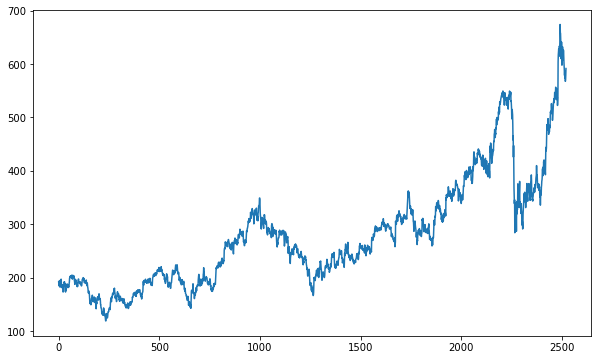

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(data)

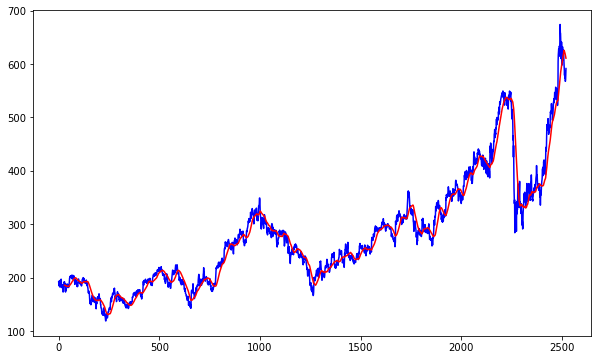

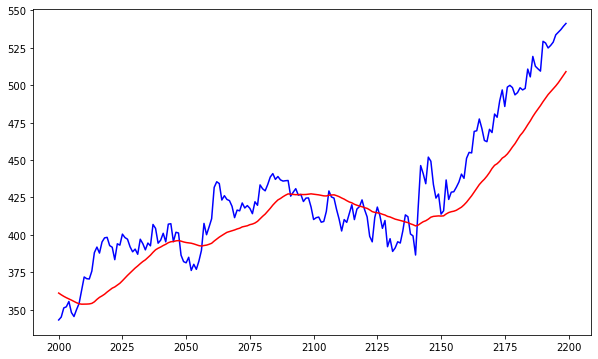

In [ ]:
#  Going for the moving average
# Taking Timestamp  to  be of size 30
Moving_Average = data.rolling(30).mean()
plt.figure(figsize=(10,6))
plt.plot(data,"b")
plt.plot(Moving_Average,"r")

#  Zooming the data
plt.figure(figsize=(10,6))
plt.plot(data[2000:2200],"b")
plt.plot(Moving_Average[2000:2200],"r")

In [ ]:
#Normalising the Data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
scaled_data = scaler.fit_transform(np.array(data).reshape(-1,1))

In [ ]:
# Splitting the data into test and train
Training_portion =0.7
Training_size =int(len(data)*Training_portion) 
Test_size = len(data) - Training_size
train_data =  scaled_data[0:Training_size]
test_data = scaled_data[Training_size:len(data)]

In [ ]:
# Here test_data is np.array as it is derived from scaled_data which is already a 2-D array

In [ ]:
def create_Y(dataset,timestamp):
    x,y =[],[]
    for i in range(0,len(dataset)-timestamp):
        list = dataset[i:(i+timestamp),0]
        x.append(list)
        y.append(dataset[i+timestamp,0])
    return np.array(x),np.array(y)    

In [ ]:
# Creating Y-data or labels..........
timestamp = 30
x_train,y_train = create_Y(train_data,timestamp)
x_test,y_test =create_Y(test_data,timestamp)

In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1734, 30) (1734,)
(726, 30) (726,)


In [ ]:
from tensorflow.keras.layers import Dropout,LSTM,Dense,Conv1D
from tensorflow.keras.models import Sequential
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [ ]:
model=Sequential()
model.add(Conv1D(64,5,strides=1,padding="causal",activation="relu",input_shape=(x_train.shape[1],1)))
model.add(LSTM(60,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(60))
model.add(Dense(30,activation="relu"))
# model.add(Dropout(0.2))
model.add(Dense(10,activation ="relu"))

model.add(Dense(1))
model.compile(loss ='mean_squared_error',optimizer ="adam")


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 30, 64)            384       
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 60)            30000     
_________________________________________________________________
lstm_5 (LSTM)                (None, 60)                29040     
_________________________________________________________________
dense_6 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 61,575
Trainable params: 61,575
Non-trainable params: 0
__________________________________________________

In [ ]:
history = model.fit(x_train,y_train,epochs =100 ,batch_size=32)

Epoch 1/100
55/55 [==============================] - 8s 37ms/step - loss: 0.0041
Epoch 2/100
55/55 [==============================] - 2s 37ms/step - loss: 4.4159e-04
Epoch 3/100
55/55 [==============================] - 2s 37ms/step - loss: 4.1667e-04
Epoch 4/100
55/55 [==============================] - 2s 37ms/step - loss: 3.7954e-04
Epoch 5/100
55/55 [==============================] - 2s 37ms/step - loss: 3.6408e-04
Epoch 6/100
55/55 [==============================] - 2s 37ms/step - loss: 3.5407e-04
Epoch 7/100
55/55 [==============================] - 2s 37ms/step - loss: 3.1492e-04
Epoch 8/100
55/55 [==============================] - 2s 37ms/step - loss: 3.2455e-04
Epoch 9/100
55/55 [==============================] - 2s 37ms/step - loss: 3.0076e-04
Epoch 10/100
55/55 [==============================] - 2s 37ms/step - loss: 3.3702e-04
Epoch 11/100
55/55 [==============================] - 2s 37ms/step - loss: 2.7409e-04
Epoch 12/100
55/55 [==============================] - 2s 37ms/step 

In [ ]:
# y = scaler.inverse_transform(y_predict_train)
print(y_predict_test.shape)
print(y_test.shape)

(726, 1)
(726,)


In [ ]:
y_predict_train = model.predict(x_train)
y_predict_test = model.predict(x_test)

In [ ]:
y_predict_train=  scaler.inverse_transform(y_predict_train)
y_predict_test=  scaler.inverse_transform(y_predict_test)

In [ ]:
import math
from sklearn.metrics import mean_squared_error


In [ ]:
print(math.sqrt(mean_squared_error(y_train,y_predict_train)))
print(math.sqrt(mean_squared_error(y_test,y_predict_test)))

230.98098857459996
399.5967724137161


In [ ]:
print(y_predict_test.shape)

(726, 1)


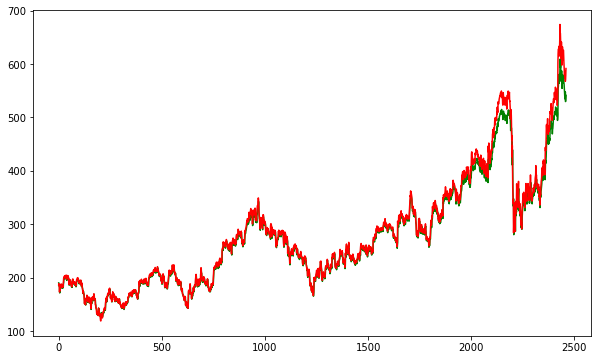

In [ ]:
Final_model = np.append(y_predict_train,y_predict_test)
plt.figure(figsize=(10,6))
plt.plot(Final_model,'g')
scaled=scaler.inverse_transform(np.array(np.append(y_train,y_test)).reshape(-1,1))

Orignal_data =np.array(scaled).reshape(-1,1 )
# plt.figure(figsize=(10,6))
plt.plot(Orignal_data,'r')
# print(orignal_data)

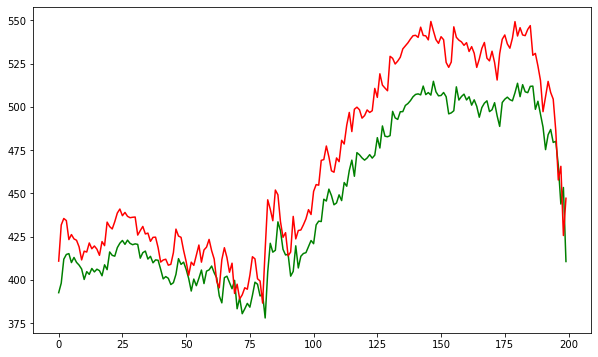

In [ ]:
# Zooming the plot for validation data
plt.figure(figsize=(10,6))
plt.plot(Final_model[2000:2200],'g')
plt.plot(Orignal_data[2000:2200],'r')



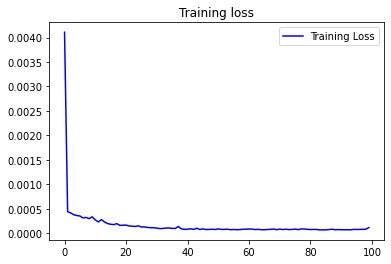

In [ ]:
loss = history.history['loss']
plt.figure()
epochs =range(100)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()
#  Seen clearly the loss 

In [ ]:
print(y_predict_test)

[[286.59766]
 [278.97214]
 [276.54794]
 [281.0837 ]
 [276.9218 ]
 [276.63376]
 [284.63617]
 [281.86673]
 [274.1581 ]
 [279.3419 ]
 [279.82178]
 [287.08737]
 [304.34695]
 [303.53543]
 [303.53656]
 [305.7519 ]
 [304.92816]
 [304.2905 ]
 [293.60425]
 [291.99484]
 [282.94363]
 [286.2317 ]
 [287.47083]
 [289.4548 ]
 [294.8083 ]
 [292.70578]
 [295.98706]
 [287.22702]
 [282.06503]
 [282.8493 ]
 [286.22403]
 [284.97855]
 [282.08087]
 [281.3115 ]
 [287.51578]
 [286.02075]
 [284.32132]
 [284.43137]
 [287.36108]
 [282.72086]
 [279.88654]
 [289.2914 ]
 [289.861  ]
 [290.9416 ]
 [294.3664 ]
 [296.6223 ]
 [287.33356]
 [284.93082]
 [275.53363]
 [268.9183 ]
 [273.7393 ]
 [275.29504]
 [271.4463 ]
 [270.92728]
 [269.26175]
 [268.13193]
 [269.27383]
 [271.66437]
 [266.5212 ]
 [270.26004]
 [265.3149 ]
 [256.8174 ]
 [264.53607]
 [260.9936 ]
 [259.55902]
 [263.64105]
 [273.60675]
 [272.67935]
 [271.96997]
 [282.4735 ]
 [289.36737]
 [302.56265]
 [300.81995]
 [295.48425]
 [293.7328 ]
 [299.6045 ]
 [310.12354]